In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

## Set up and basic information

In [26]:
# Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn

# Display all data frame rows
pd.set_option('display.max_rows', None)

gme = yf.Ticker("GME")

# Get stock info (info -> very big, check for potentially important data)
gme_info = gme.info

# Lists of data to print
gme_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
gme_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$GME STOCK INFO")
print("--------------")

for i in range(len(gme_title_list)):
    print(gme_info_print[i] + ": " + str(gme_info[gme_title_list[i]]) + '\n')

$GME STOCK INFO
--------------
Name: GameStop Corporation

Symbol: GME

City: Grapevine

State: TX

Country: United States

Website: http://www.gamestop.com

Phone: 817 424 2000

Sector: Consumer Cyclical

Industry: Specialty Retail

Number of Employees: 14000

Time Zone: America/New_York

Stock Exchange: NYQ

Quote Type: EQUITY

Summary: GameStop Corp. operates as a multichannel video game, consumer electronics, and collectibles retailer in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, including controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and prepaid subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as

# GME 

## Stock Stats

In [27]:
# Get historical market data
hist = gme.history(period="1mo")
clean_hist = hist.drop(['Dividends', 'Stock Splits'], axis=1)

difference = clean_hist['Close'] - clean_hist['Open']
difference.to_frame()

clean_hist = pd.concat([clean_hist,difference],axis=1)
clean_hist = clean_hist.rename(columns={0:"Daily Change"})
clean_hist

,Open,High,Low,Close,Volume,Daily Change
Date,,,,,,
2020-12-29,20.820000,21.070000,18.559999,19.379999,9241400,-1.440001
2020-12-30,19.379999,20.000000,18.850000,19.260000,5934400,-0.119999
2020-12-31,19.250000,19.799999,18.799999,18.840000,6918900,-0.410000
2021-01-04,19.000000,19.100000,17.150000,17.250000,10022500,-1.750000
2021-01-05,17.350000,18.080000,17.230000,17.370001,4961500,0.020000
2021-01-06,17.340000,18.980000,17.330000,18.360001,6056200,1.020000
2021-01-07,18.469999,19.450001,18.020000,18.080000,6129300,-0.389999
2021-01-08,18.180000,18.299999,17.080000,17.690001,6464500,-0.490000
2021-01-11,19.410000,20.650000,19.010000,19.940001,14927600,0.530001


In [28]:
mean = clean_hist.mean().to_frame().rename(columns={0:"Average"}).round(2)
maxdf = clean_hist.max().to_frame().rename(columns={0:"Max"}).round(1)
mindf = clean_hist.min().to_frame().rename(columns={0:"Min"}).round(1)
stats = pd.concat([mean,maxdf,mindf],axis=1)
stats

,Average,Max,Min
Open,59.62,354.8,17.3
High,80.89,483.0,18.1
Low,43.95,249.0,17.1
Close,59.30,347.5,17.2
Volume,58648342.86,196784300.0,4961500.0
Daily Change,-0.32,59.4,-71.4


## Graphs

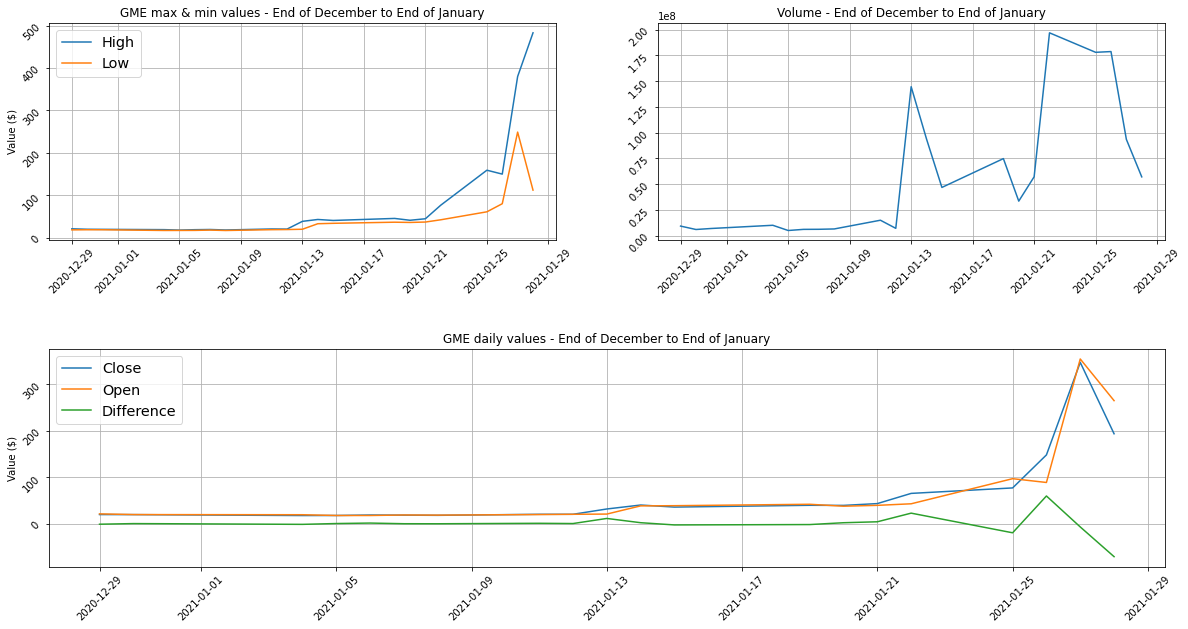

In [55]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.5)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

ax1.plot(clean_hist["High"],label="High")
ax1.plot(clean_hist["Low"],label="Low")
ax1.set_title("GME max & min values - End of December to End of January")
ax1.set(ylabel="Value ($)")
ax1.grid()
ax1.legend(fontsize='x-large')
ax1.tick_params(labelrotation=45)

ax2.plot(clean_hist["Volume"])
ax2.grid()
ax2.set_title("Volume - End of December to End of January")
ax2.tick_params(labelrotation=45)

ax3.plot(clean_hist["Close"],label="Close")
ax3.plot(clean_hist["Open"],label="Open")
ax3.plot(clean_hist["Daily Change"],label="Difference")
ax3.grid()
ax3.set_title("GME daily values - End of December to End of January")
ax3.set(ylabel="Value ($)")
ax3.legend(fontsize='x-large')
ax3.tick_params(labelrotation=45)

In [15]:
gme.major_holders

,0,1
0,27.33%,% of Shares Held by All Insider
1,122.04%,% of Shares Held by Institutions
2,167.96%,% of Float Held by Institutions
3,286,Number of Institutions Holding Shares


In [11]:
gme.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"FMR, LLC",9534090,2020-09-29,0.1367,97247718
1,Blackrock Inc.,8600507,2020-09-29,0.1233,87725171
2,"Vanguard Group, Inc. (The)",5288116,2020-09-29,0.0758,53938783
3,"Susquehanna International Group, LLP",4444128,2020-09-29,0.0637,45330105
4,Dimensional Fund Advisors LP,3948114,2020-09-29,0.0566,40270762
5,Senvest Management LLC,3225740,2020-09-29,0.0462,32902548
6,State Street Corporation,2609487,2020-09-29,0.0374,26616767
7,Morgan Stanley,1995842,2020-09-29,0.0286,20357588
8,"Permit Capital, LLC",1951000,2020-09-29,0.0280,19900200
9,"Paradice Investment Management, LLC",1832526,2020-09-29,0.0263,18691765


In [12]:
gme.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-08-17 10:52:00,Ascendiant Capital,Buy,,main
2012-09-04 05:41:00,Goldman Sachs,Buy,Neutral,up
2012-09-05 10:10:00,National Alliance,Market Perform,,main
2012-09-13 15:46:00,PiperJaffray,Neutral,,main
2012-10-09 16:19:00,PiperJaffray,Neutral,,main
2012-11-16 05:59:00,Ascendiant Capital,Buy,,main
2013-01-08 15:17:10,PiperJaffray,Neutral,,main
2013-02-01 06:30:56,PiperJaffray,Overweight,Neutral,up
2013-03-26 08:55:25,Oppenheimer,Perform,,main


In [13]:
gme.calendar

,0,1
Earnings Date,2021-03-24 00:00:00,2021-03-29 00:00:00
Earnings Average,1.42,1.42
Earnings Low,0.84,0.84
Earnings High,1.83,1.83
Revenue Average,2293450000,2293450000
Revenue Low,2085220000,2085220000
Revenue High,2727000000,2727000000
